In [13]:
# Importando bibliotecas usuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# importando bibliotecas para treino do modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
##from imblearn.pipeline import Pipeline as ImbPipeline
#Lendo novo Dataset
new_df = pd.read_csv('dataset_delegacias')

In [14]:
#verificando os tipos de dados
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   orgao_responsavel      5000 non-null   object
 1   ano                    5000 non-null   int64 
 2   mes                    5000 non-null   int64 
 3   dia_semana_name        5000 non-null   object
 4   tipo_crime             5000 non-null   object
 5   quantidade_ocorrencia  5000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 234.5+ KB
None


In [18]:
# Transformando colunas categóricas em numéricas
colunas_categoricas = ['orgao_responsavel','dia_semana_name', 'tipo_crime']
colunas_pre_encoded = OneHotEncoder(drop='first', sparse_output=False)
colunas_encoded = colunas_pre_encoded.fit_transform(new_df[colunas_categoricas])
#Resgatando nomes das colunas que vão passar por hot encoding
feature_names = colunas_pre_encoded.get_feature_names_out(colunas_categoricas)
#Criando DataFrame com as colunas transformadas
df_encoded = pd.DataFrame(colunas_encoded, columns=feature_names)
df_encoded['ano'] = new_df['ano']
df_encoded['mes'] = new_df['mes']
df_encoded['quantidade_ocorrencia'] = new_df['quantidade_ocorrencia']
df_encoded['tipo_crime'] = new_df['tipo_crime']
df_encoded.head()



,orgao_responsavel_Delegacia Boa Viagem,orgao_responsavel_Delegacia Casa Forte,orgao_responsavel_Delegacia Pina,orgao_responsavel_Delegacia Santo Amaro,orgao_responsavel_Delegacia Torre,dia_semana_name_Monday,dia_semana_name_Saturday,dia_semana_name_Sunday,dia_semana_name_Thursday,dia_semana_name_Tuesday,...,tipo_crime_Homicídio,tipo_crime_Latrocínio,tipo_crime_Roubo,tipo_crime_Sequestro,tipo_crime_Tráfico de Drogas,tipo_crime_Violência Doméstica,ano,mes,quantidade_ocorrencia,tipo_crime
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2024,8,2,Sequestro
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2022,10,1,Homicídio
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2023,3,1,Furto
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2025,4,2,Roubo
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2025,6,1,Roubo


In [20]:
# Dividindo os dados em treino e teste para modelo geral das delegacias
X_geral = df_encoded[['orgao_responsavel_Delegacia Boa Viagem', 'orgao_responsavel_Delegacia Casa Forte', 'orgao_responsavel_Delegacia Pina', 'orgao_responsavel_Delegacia Santo Amaro', 'orgao_responsavel_Delegacia Torre', 'ano', 'mes','dia_semana_name_Monday','dia_semana_name_Saturday','dia_semana_name_Sunday','dia_semana_name_Thursday','dia_semana_name_Tuesday']]
y_geral = df_encoded['quantidade_ocorrencia']

X_train_geral, X_test_geral, y_train_geral, y_test_geral = train_test_split(X_geral, y_geral, test_size=0.2, random_state=42)

In [21]:
# Treinando o modelo de RandomForestRegressor
modelo_geral = RandomForestRegressor()
modelo_geral.fit(X_train_geral, y_train_geral)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# Dividindo os dados em treino e teste mais específico para tipo_crime
X = df_encoded[['orgao_responsavel_Delegacia Boa Viagem', 'orgao_responsavel_Delegacia Casa Forte', 'orgao_responsavel_Delegacia Pina', 'orgao_responsavel_Delegacia Santo Amaro', 'orgao_responsavel_Delegacia Torre', 'tipo_crime_Furto', 'tipo_crime_Homicídio', 'tipo_crime_Latrocínio', 'tipo_crime_Roubo', 'tipo_crime_Sequestro', 'tipo_crime_Tráfico de Drogas', 'tipo_crime_Violência Doméstica', 'ano', 'mes', 'dia_semana_name_Monday','dia_semana_name_Saturday','dia_semana_name_Sunday','dia_semana_name_Thursday','dia_semana_name_Tuesday']]
y = df_encoded['quantidade_ocorrencia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho treino:", len(X_train))
print("Tamanho teste:", len(X_test))
print('Tamanho treino', len(y_train))
print("Tamanho teste:", len(y_test))

Tamanho treino: 4000
Tamanho teste: 1000
Tamanho treino 4000
Tamanho teste: 1000


In [23]:
# Treinando o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Coeficiente (inclinação):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)

Coeficiente (inclinação): -0.029036735000401874
Intercepto: 30.98500285667206


Erro Médio Absoluto (MAE): 0.4


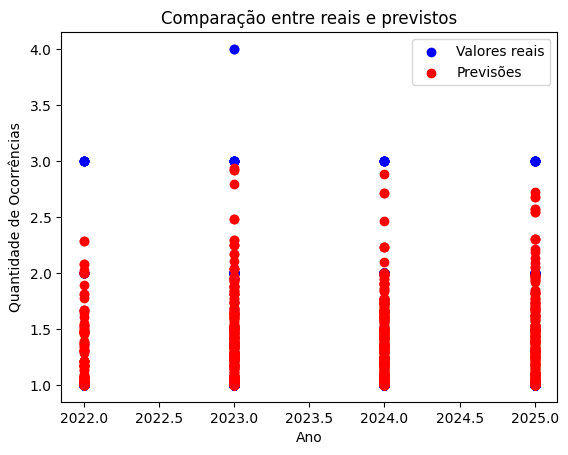

In [26]:
y_pred_geral = modelo_geral.predict(X_test_geral)
mae = mean_absolute_error(y_test_geral, y_pred_geral)
print("Erro Médio Absoluto (MAE):", round(mae, 2))

# Comparando valores reais x previstos
plt.scatter(X_test_geral['ano'], y_test_geral, color="blue", label="Valores reais")
plt.scatter(X_test_geral['ano'], y_pred_geral, color="red", label="Previsões")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Ocorrências")
plt.title("Comparação entre reais e previstos")
plt.legend()
plt.show()

Erro Médio Absoluto (MAE): 0.48


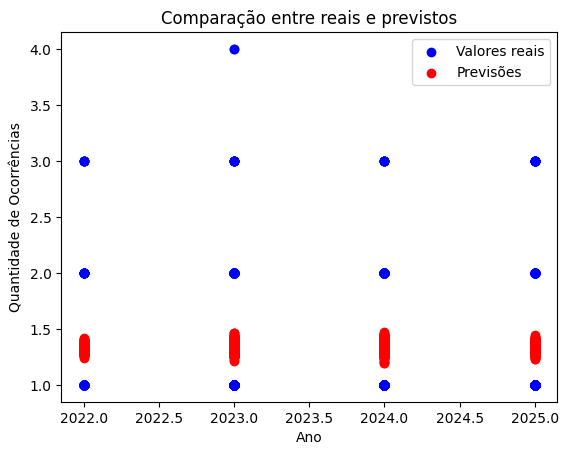

In [27]:
y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Erro Médio Absoluto (MAE):", round(mae, 2))

# Comparando valores reais x previstos
plt.scatter(X_test['ano'], y_test, color="blue", label="Valores reais")
plt.scatter(X_test['ano'], y_pred, color="red", label="Previsões")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Ocorrências")
plt.title("Comparação entre reais e previstos")
plt.legend()
plt.show()

In [28]:
# Exportar o DataFrame df_encoded para um arquivo CSV
output_file = 'dataset_encoded.csv'
df_encoded.to_csv(output_file, index=False)
print(f"Arquivo exportado com sucesso: {output_file}")

Arquivo exportado com sucesso: dataset_encoded.csv
